# Assignment: Ionosphere Data Problem

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load Data:
[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/ionosphere_data.csv)

In [2]:
ionosphere = pd.read_csv('ionosphere_data.csv')
ionosphere.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [3]:
ionosphere.describe().T

,count,mean,std,min,25%,50%,75%,max
feature1,351.0,0.891738,0.311155,0.0,1.000000,1.00000,1.000000,1.0
feature2,351.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.0
feature3,351.0,0.641342,0.497708,-1.0,0.472135,0.87111,1.000000,1.0
feature4,351.0,0.044372,0.441435,-1.0,-0.064735,0.01631,0.194185,1.0
feature5,351.0,0.601068,0.519862,-1.0,0.412660,0.80920,1.000000,1.0
feature6,351.0,0.115889,0.460810,-1.0,-0.024795,0.02280,0.334655,1.0
feature7,351.0,0.550095,0.492654,-1.0,0.211310,0.72873,0.969240,1.0
feature8,351.0,0.119360,0.520750,-1.0,-0.054840,0.01471,0.445675,1.0
feature9,351.0,0.511848,0.507066,-1.0,0.087110,0.68421,0.953240,1.0
feature10,351.0,0.181345,0.483851,-1.0,-0.048075,0.01829,0.534195,1.0


In [4]:
ionosphere.shape

(351, 35)

In [5]:
ionosphere.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 35 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature1   351 non-null    int64  
 1   feature2   351 non-null    int64  
 2   feature3   351 non-null    float64
 3   feature4   351 non-null    float64
 4   feature5   351 non-null    float64
 5   feature6   351 non-null    float64
 6   feature7   351 non-null    float64
 7   feature8   351 non-null    float64
 8   feature9   351 non-null    float64
 9   feature10  351 non-null    float64
 10  feature11  351 non-null    float64
 11  feature12  351 non-null    float64
 12  feature13  351 non-null    float64
 13  feature14  351 non-null    float64
 14  feature15  351 non-null    float64
 15  feature16  351 non-null    float64
 16  feature17  351 non-null    float64
 17  feature18  351 non-null    float64
 18  feature19  351 non-null    float64
 19  feature20  351 non-null    float64
 20  feature21 

# check duplicate value

In [76]:
ionosphere.duplicated().sum()

1

In [77]:
ionosphere.drop_duplicates(inplace=True)

 # Check Null values

In [78]:
ionosphere.isnull().sum()

feature1     0
feature2     0
feature3     0
feature4     0
feature5     0
feature6     0
feature7     0
feature8     0
feature9     0
feature10    0
feature11    0
feature12    0
feature13    0
feature14    0
feature15    0
feature16    0
feature17    0
feature18    0
feature19    0
feature20    0
feature21    0
feature22    0
feature23    0
feature24    0
feature25    0
feature26    0
feature27    0
feature28    0
feature29    0
feature30    0
feature31    0
feature32    0
feature33    0
feature34    0
label        0
dtype: int64

## we have one column which is object dtype (convert it into numerical form)

In [79]:
ionosphere.label = LabelEncoder().fit_transform(ionosphere.label)

# split the coulmns for input and output

In [80]:
data = ionosphere.loc[:,ionosphere.columns != 'label']
label = ionosphere.iloc[:,ionosphere.columns == 'label']

In [81]:
print(f'shape of data --> {data.shape} \nshape of label --> {label.shape}')

shape of data --> (350, 34) 
shape of label --> (350, 1)


# split the data for training and testing

In [84]:
x_train, x_test, y_train, y_test = train_test_split(data, label, test_size=0.4, random_state=20)

In [85]:
print(f'''shape of x_train -> {x_train.shape}
shape of y_train --> {y_train.shape}
shape of x_test -> {x_test.shape}
shape of y_test --> {y_test.shape}''')

shape of x_train -> (210, 34)
shape of y_train --> (210, 1)
shape of x_test -> (140, 34)
shape of y_test --> (140, 1)


In [86]:
type(x_train)

pandas.core.frame.DataFrame

# convert into array form

In [87]:
x_train = np.asarray(x_train).astype('float32')
x_test = np.asarray(x_test).astype('float32')
y_train = np.asarray(y_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')

In [88]:
type(x_train)

numpy.ndarray

# build a model

In [102]:
def build_model():
    model = Sequential()
    model.add(Dense(16, activation = 'relu', input_shape = (x_train.shape[1],)))
    model.add(Dense(1, activation = 'sigmoid'))
    model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

In [103]:
model = build_model()
history = model.fit(x_train, y_train, epochs = 50, batch_size = 1)

Epoch 1/50
210/210 [==============================] - 1s 1ms/step - loss: 0.6369 - accuracy: 0.6905
Epoch 2/50
210/210 [==============================] - 0s 1ms/step - loss: 0.5368 - accuracy: 0.7238
Epoch 3/50
210/210 [==============================] - 0s 1ms/step - loss: 0.4725 - accuracy: 0.7857
Epoch 4/50
210/210 [==============================] - 0s 995us/step - loss: 0.4203 - accuracy: 0.8190
Epoch 5/50
210/210 [==============================] - 0s 996us/step - loss: 0.3678 - accuracy: 0.8667
Epoch 6/50
210/210 [==============================] - 0s 1ms/step - loss: 0.3457 - accuracy: 0.8571
Epoch 7/50
210/210 [==============================] - 0s 978us/step - loss: 0.3069 - accuracy: 0.8810
Epoch 8/50
210/210 [==============================] - 0s 1ms/step - loss: 0.2742 - accuracy: 0.8857
Epoch 9/50
210/210 [==============================] - ETA: 0s - loss: 0.2591 - accuracy: 0.88 - 0s 1ms/step - loss: 0.2647 - accuracy: 0.8810
Epoch 10/50
210/210 [==============================]

# Evaluate the model

In [104]:
model.evaluate(x_test,y_test)

5/5 [==============================] - 0s 3ms/step - loss: 0.2794 - accuracy: 0.9286


[0.27938053011894226, 0.9285714030265808]

# Predict the model

In [112]:
result = model.predict(x_test)
result.flatten().astype('U8')

array(['0.083728', '0.989296', '0.874245', '0.999410', '0.968243',
       '0.976152', '0.998247', '0.503458', '0.992446', '0.996442',
       '0.991920', '0.988132', '0.002115', '0.985160', '0.999948',
       '0.000189', '0.748765', '0.999970', '0.934808', '0.005057',
       '0.900750', '0.415955', '0.994505', '0.997945', '0.766724',
       '0.959442', '0.019717', '0.221447', '0.999537', '0.897226',
       '0.968687', '0.026710', '0.999933', '0.099418', '0.978099',
       '0.995388', '0.014355', '0.855088', '0.999932', '0.995176',
       '0.994227', '0.992308', '0.998655', '0.000548', '0.024364',
       '0.974839', '0.999674', '0.997632', '0.866387', '0.995245',
       '0.975537', '0.999301', '0.768714', '0.281157', '0.998046',
       '0.203930', '0.975876', '0.963417', '0.993417', '0.990836',
       '0.999845', '0.001052', '0.921126', '0.004368', '0.853192',
       '0.985840', '0.011930', '0.493443', '0.000317', '0.040440',
       '3.629557', '0.021352', '0.990900', '0.038493', '0.9984

# representation of loss and accuracy 

In [114]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

In [116]:
loss = history.history['loss']
acc = history.history['accuracy']
epochs = range(1, len(loss) + 1)

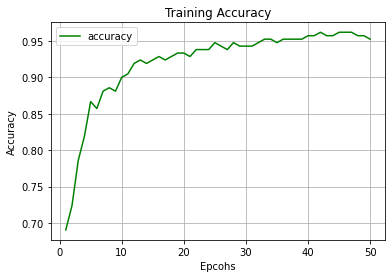

In [123]:
plt.plot(epochs, acc, 'g', label = 'accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epcohs')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()
plt.show()

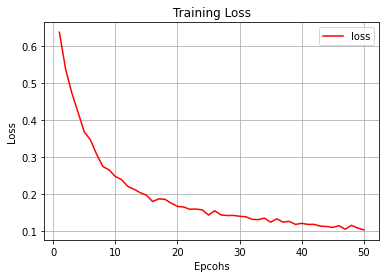

In [124]:
plt.plot(epochs, loss, 'r', label = 'loss')
plt.title('Training Loss')
plt.xlabel('Epcohs')
plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.show()